In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()


ModuleNotFoundError: No module named 'nltk'

In [8]:
dataset = pd.read_csv("/home/tony/Desktop/My_repos/Dataquest-modules/My_Notebooks/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv")

In [10]:
#Missing Numbers
import missingno as msno

msno.bar(dataset,sort=True,figsize=(30,8),color="#34495e",fontsize=15,labels=True)


ValueError: The "sort" parameter must be set to "ascending" or "descending".

In [11]:
#Removing NA's
data = dataset.dropna()
data = data.reset_index(drop=True)

In [12]:
#NLP for Negative Reviews
negative_comment = []

for comment in data['Negative_Review']:
    only_letters = re.sub("[^a-zA-Z]", " ",comment)
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
    negative_comment.append(' '.join(lemmas))

In [13]:
#NLP for Positive Reviews
positive_comment = []

for comment in data['Positive_Review']:
    only_letters2 = re.sub("[^a-zA-Z]", " ",comment)
    tokens2 = nltk.word_tokenize(only_letters2)
    lower_case2 = [l.lower() for l in tokens2]
    filtered_result2 = list(filter(lambda l: l not in stop_words, lower_case2))
    lemmas2 = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result2] 
    positive_comment.append(' '.join(lemmas2))

In [14]:
#Finding most important words in Negative Reviews
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(negative_comment)
temp1_counts = most_negative_words.sum(axis=0)
temp1_words = cv.vocabulary_

In [ ]:
#Some words are appearing a lot. Let's make new columns for these words

In [15]:
#room_small
room_small = np.zeros(len(data))
for i in range(len(data)):
    if ("room small" in negative_comment[i]) or ("small room" in negative_comment[i]):
        room_small[i] = 1

In [16]:
#wi-fi
wi_fi = np.zeros(len(data))
for i in range(len(data)):
    if ("wi fi" in negative_comment[i]):
        wi_fi[i] = 1

In [53]:
#air-conditioner
air_conditioning = np.zeros(len(data))
for i in range(len(data)):
    if ("air conditioning" in negative_comment[i]) or ("air conditioner" in negative_comment[i]) : 
        air_conditioning[i] = 1
np.sum(air_conditioning)

6314.0

In [17]:
#booking com
booking_com = np.zeros(len(data))
for i in range(len(data)):
    if ("booking com" in negative_comment[i]): 
        booking_com[i] = 1
np.sum(booking_com)

3890.0

In [18]:
#breakfast
breakfast = np.zeros(len(data))
for i in range(len(data)):
    if ("breakfast expensive" in negative_comment[i]) or ("breakfast included" in negative_comment[i]) or ("breakfast room" in negative_comment[i]) or ("tea coffee" in negative_comment[i]): 
        breakfast[i] = -1
np.sum(breakfast)

-11356.0

In [19]:
#room_problem
room_problem = np.zeros(len(data))
for i in range(len(data)):
    if ("mini bar" in negative_comment[i]) or ("room service" in negative_comment[i]) or ("double bed" in negative_comment[i]) or ("double room" in negative_comment[i]): 
        room_problem[i] = 1
np.sum(room_problem)

13459.0

In [20]:
#Finding most important words in Positive Reviews
cv2 = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv2.fit_transform(positive_comment)
temp2_counts = most_positive_words.sum(axis=0)
temp2_words = cv2.vocabulary_

In [21]:
#Location
location = np.zeros(len(data))
for i in range(len(data)):
    if ("good location" in positive_comment[i]) or ("great location" in positive_comment[i]) or ("location excellent" in positive_comment[i]) or ("location great" in positive_comment[i]) or ("location good" in positive_comment[i]) or ("walking distance" in positive_comment[i]) or ("excellent location" in positive_comment[i]): 
        location[i] = 1
np.sum(location)

90328.0

In [22]:
#Staff
staff = np.zeros(len(data))
for i in range(len(data)):
    if ("friendly helpful" in positive_comment[i]) or ("friendly staff" in positive_comment[i]) or ("helpful staff" in positive_comment[i]) or ("staff helpful" in positive_comment[i]) or ("staff friendly" in positive_comment[i]): 
        staff[i] = 1
np.sum(staff)

87814.0

In [23]:
#bed and room
bed_and_room = np.zeros(len(data))
for i in range(len(data)):
    if ("bed comfortable" in positive_comment[i]) or ("clean room" in positive_comment[i]) or ("comfortable bed" in positive_comment[i]) or ("comfortable room" in positive_comment[i]) or ("comfy bed" in positive_comment[i]) or ("room clean" in positive_comment[i]) :
        bed_and_room[i] = 1
np.sum(bed_and_room)

56091.0

In [24]:
#breakfast
for i in range(len(data)):
    if ("breakfast good" in positive_comment[i]) or ("good breakfast" in positive_comment[i]): 
        breakfast[i] = breakfast[i]+ 1
np.sum(breakfast)


6026.0

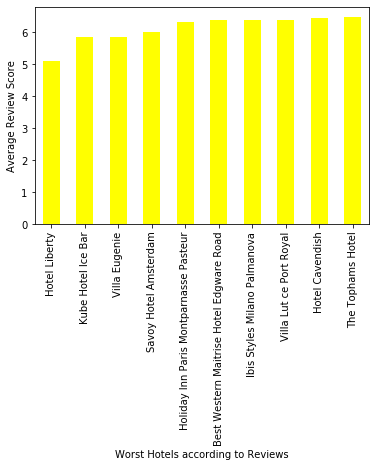

In [25]:
#Worst Hotels
worst_hotels =data.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(10)
worst_hotels.plot(kind="bar",color="Yellow")
_=plt.xlabel('Worst Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

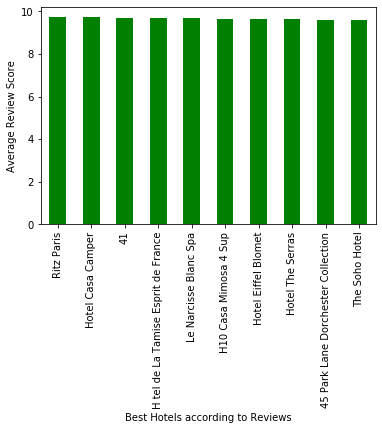

In [26]:
#Best Hotels
best_hotels = data.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(10)
best_hotels.plot(kind="bar",color = "Green")
_=plt.xlabel('Best Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

In [27]:
#Countries are taken from the link below
# https://gist.github.com/Desperado/3293395#file-countryinfo-py
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
]

In [28]:
data['Reviewer_Nationality'].value_counts().sort_values(ascending=False).head(20)

 United Kingdom               244457
 United States of America      35196
 Australia                     21540
 Ireland                       14746
 United Arab Emirates          10176
 Saudi Arabia                   8914
 Netherlands                    8706
 Switzerland                    8616
 Germany                        7843
 Canada                         7813
 France                         7233
 Israel                         6536
 Italy                          6061
 Belgium                        5991
 Turkey                         5383
 Kuwait                         4904
 Spain                          4694
 Romania                        4424
 Russia                         3844
 South Africa                   3795
Name: Reviewer_Nationality, dtype: int64

In [29]:
europe_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Europe':
        europe_list.append(countries[j]['name'])

asia_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Asia':
        asia_list.append(countries[j]['name'])

northamerica_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'North America':
        northamerica_list.append(countries[j]['name'])

southamerica_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'South America':
        southamerica_list.append(countries[j]['name'])
        
oceania_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Oceania':
        oceania_list.append(countries[j]['name'])

africa_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Africa':
        africa_list.append(countries[j]['name'])

In [30]:
#Changing some of components in the list due to conveinence like United States = United States of America
northamerica_list[17] = 'United States of America'
europe_list[14] = 'Ireland'        
europe_list[23] = 'Netherlands'
asia_list[7] = 'China'    

In [31]:
# There are empty chracters in the beginnig and in the end of Reviewer_Nationality
data['Reviewer_Nationality'] = data['Reviewer_Nationality'].map(lambda x: x[1:-1])


In [32]:
#Adding continent column to data
continent = []
for k in range(len(data)):
    if data['Reviewer_Nationality'][k] in europe_list:
        continent.append("Europe")
    elif data['Reviewer_Nationality'][k] in asia_list:
        continent.append("Asia")
    elif data['Reviewer_Nationality'][k] in africa_list:
        continent.append("Africa")
    elif data['Reviewer_Nationality'][k] in oceania_list:
        continent.append("Oceania")
    elif data['Reviewer_Nationality'][k] in northamerica_list:
        continent.append("North America")
    elif data['Reviewer_Nationality'][k] in southamerica_list:
        continent.append("South America")
    else:
        continent.append("Other")

continent = pd.Series(continent)
data['continent'] = continent

In [33]:
#Day_Passed
import re
data['Day_Passed'] = data['days_since_review'].map(lambda x: re.findall(r'\d+',x))
data['Day_Passed'] = data['Day_Passed'].map(lambda x: x[0])
del data['days_since_review']
data['Day_Passed'] = data['Day_Passed'].astype(int)

In [34]:
#Mining some important information from tags
data['Leisure'] = data['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
data['Business'] = data['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
data['Trip_type'] = data['Leisure'] + data['Business']

In [35]:
#Approximately , 15000 trips aren't evaluated as leisure or business. Let's assign them numbers with probabilities
# I give 80 percent of them as Leisure , 20 percent of them as Business due to previous counts

In [36]:
import random
data['Trip_type'] = data[data['Trip_type'] == 0]['Trip_type'].map(lambda x: 1 if random.random() > 0.2 else 2)
data['Trip_type'] = data['Trip_type'].fillna(0)
data['Trip_type'] = data['Trip_type'] + data['Business'] + data['Leisure']
del data['Leisure'] , data['Business']

In [37]:
data['Trip_type'].value_counts()

1.0    427096
2.0     85374
Name: Trip_type, dtype: int64

In [38]:
#It is OK now

In [39]:
#Couple or Solo or Group or Family_with_older children or Family with younger Children
data['Solo'] = data['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
data['Couple'] = data['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)
data['Group'] = data['Tags'].map(lambda x: 3 if ' Group ' in x else 0)
data['Family_with_young_children'] = data['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)
data['Family_with_older_children'] = data['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)
data['whom'] = data['Solo'] + data['Couple'] + data['Group'] + data['Family_with_young_children'] + data['Family_with_older_children']
del data['Solo'], data['Couple'],data['Group'], data['Family_with_young_children'],data['Family_with_older_children']


In [40]:
data.whom.value_counts()

2    250756
1    107844
3     64944
4     60603
5     26196
0      2127
Name: whom, dtype: int64

In [41]:
#I will assign 2 to 0's because it is the most.
data['whom'] = data['whom'].map(lambda x: 2 if x == 0 else x)
data.whom.value_counts()

2    252883
1    107844
3     64944
4     60603
5     26196
Name: whom, dtype: int64

In [43]:
#It is OK now

In [42]:
#Stayings
data['Stayed_1_days'] = data['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
data['Stayed_2_days'] = data['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
data['Stayed_3_days'] = data['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
data['Stayed_4_days'] = data['Tags'].map(lambda x: 4 if ' Stayed 4 nights ' in x else 0)
data['Stayed_5_days'] = data['Tags'].map(lambda x: 5 if ' Stayed 5 nights ' in x else 0)
data['Stayed_6_days'] = data['Tags'].map(lambda x: 6 if ' Stayed 6 nights ' in x else 0)
data['Stayed_7_days'] = data['Tags'].map(lambda x: 7 if ' Stayed 7 nights ' in x else 0)
data['Stayed_8_days'] = data['Tags'].map(lambda x: 8 if ' Stayed 8 nights ' in x else 0)
data['Stayed_9_days'] = data['Tags'].map(lambda x: 9 if ' Stayed 9 nights ' in x else 0)
data['Stayed_10_days'] = data['Tags'].map(lambda x: 10 if ' Stayed 10 nights ' in x else 0)
data['Stayed_11_days'] = data['Tags'].map(lambda x: 11 if ' Stayed 11 nights ' in x else 0)
data['Stayed_12_days'] = data['Tags'].map(lambda x: 12 if ' Stayed 12 nights ' in x else 0)
data['Stayed_13_days'] = data['Tags'].map(lambda x: 13 if ' Stayed 13 nights ' in x else 0)
data['Stayed_14_days'] = data['Tags'].map(lambda x: 14 if ' Stayed 14 nights ' in x else 0)
data['Stayed_15_days'] = data['Tags'].map(lambda x: 15 if ' Stayed 15 nights ' in x else 0)
data['Stayed_16_days'] = data['Tags'].map(lambda x: 16 if ' Stayed 16 nights ' in x else 0)
data['Stayed_17_days'] = data['Tags'].map(lambda x: 17 if ' Stayed 17 nights ' in x else 0)
data['Stayed_18_days'] = data['Tags'].map(lambda x: 18 if ' Stayed 18 nights ' in x else 0)
data['Stayed_19_days'] = data['Tags'].map(lambda x: 19 if ' Stayed 19 nights ' in x else 0)
data['Stayed_20_days'] = data['Tags'].map(lambda x: 20 if ' Stayed 20 nights ' in x else 0)


In [44]:
temp_list = []
for j in range(20,40):
    sum = np.sum(data.iloc[:,j])/(j-19)
    temp_list.append(sum)

In [45]:
staying = np.array(temp_list,dtype=int)
np.sum(staying)

512186

In [46]:
#There are 512470 - 512186 = 284 reviews whose stayings is over 20.
# I will assign all of them as 21 as conveinence

In [47]:
data['stayed_days'] = data['Stayed_1_days'] + data['Stayed_2_days'] + data['Stayed_3_days'] + data['Stayed_4_days'] + data['Stayed_5_days'] + data['Stayed_6_days'] + data['Stayed_7_days'] + data['Stayed_8_days'] + data['Stayed_9_days'] + data['Stayed_10_days'] + data['Stayed_11_days'] + data['Stayed_12_days'] + data['Stayed_13_days'] + data['Stayed_14_days'] + data['Stayed_15_days'] + data['Stayed_16_days'] + data['Stayed_17_days'] + data['Stayed_18_days'] + data['Stayed_19_days'] + data['Stayed_20_days']
del data['Stayed_1_days'] , data['Stayed_2_days'] , data['Stayed_3_days'] , data['Stayed_4_days'], data['Stayed_5_days'] , data['Stayed_6_days'] , data['Stayed_7_days'] , data['Stayed_8_days'] , data['Stayed_9_days'] , data['Stayed_10_days'] , data['Stayed_11_days'] , data['Stayed_12_days'] , data['Stayed_13_days'] , data['Stayed_14_days'] , data['Stayed_15_days'] , data['Stayed_16_days'] , data['Stayed_17_days'] , data['Stayed_18_days'] , data['Stayed_19_days'] , data['Stayed_20_days']



In [48]:
data.shape

(512470, 21)

In [49]:
data.stayed_days.value_counts()
#Assgining stayings which are over 20 days as 21
data['stayed_days'] = data['stayed_days'].map(lambda x: 21 if x == 0 else x)

In [50]:
#To check
len(data[data['stayed_days'] == 0])


0

In [51]:
#It is OK !!

In [54]:
#Adding the extracted columns
data['room_small'] = room_small
data['wi_fi'] = wi_fi
data['air_conditioning'] = air_conditioning
data['breakfast'] = breakfast
data['booking_com'] = booking_com
data['room_problem'] = room_problem
data['location'] = location
data['staff'] = staff
data['bed_and_room'] = bed_and_room

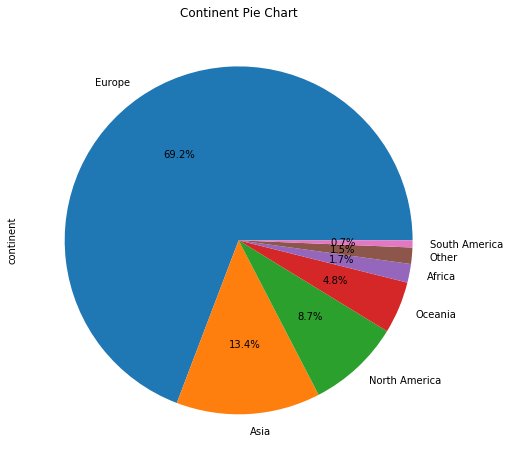

In [55]:
##Reviewer Continent Distribution
plt.figure(figsize=(12,8))
data.continent.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Continent Pie Chart')
plt.show()

In [ ]:
#Most of travellers are from Europe. Asia is the Second


In [56]:
#Getting year and month infos
year = data['Review_Date'].map(lambda x: x.split('/')[2])
month = data['Review_Date'].map(lambda x: x.split('/')[0])
data['month'] = month
data['year'] = year
del data['Review_Date']

In [57]:
#Hotel Country
country = data['Hotel_Address'].map(lambda x: x.split()[-1])
country = country.map(lambda x: 'United Kingdom' if x == 'Kingdom' else x)
data['hotel_country'] = country

In [58]:
#Mobile device
data['mobile_device'] = data['Tags'].map(lambda x: 1 if ' Submitted from a mobile device ' in x else 0)


In [59]:
##Most satisfied people with respect to continents
data.groupby('continent')['Reviewer_Score'].mean().sort_values(ascending=False).head(7)


continent
North America    8.739470
Oceania          8.598920
South America    8.435867
Europe           8.408083
Other            8.210257
Africa           8.205784
Asia             8.078886
Name: Reviewer_Score, dtype: float64

In [ ]:
#North Americans are satisfies most, Asians are least .


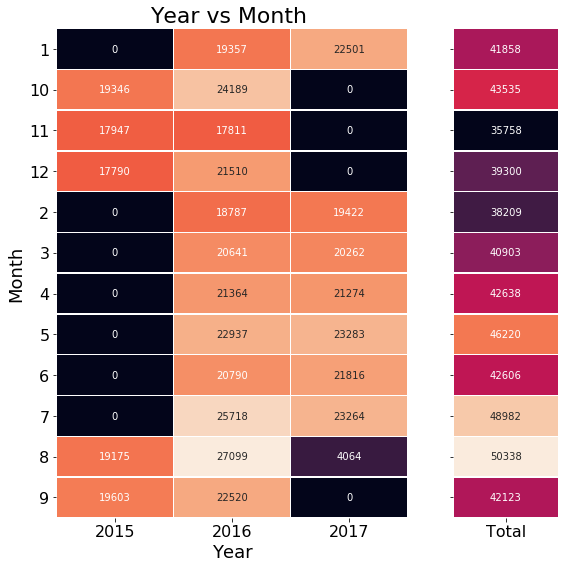

In [60]:
#Year vs Month
##Target_type vs Year
a=data.groupby(['year','month']).size()
a
b=a.unstack(level=0)
e=b.replace(np.nan,0)
e=e.astype(int)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(9, 9)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1.5]) 
ax0 = plt.subplot(gs[0])
sns.heatmap(e,annot=True,fmt='d',linewidths=.5,ax=ax0, cbar=False,annot_kws={"size":10})
ax1 = plt.subplot(gs[1],sharey=ax0)
sns.heatmap(pd.DataFrame(e.sum(axis=1)),annot=True,fmt='d',linewidths=.5,ax=ax1,cbar=False,annot_kws={"size":10})
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.set_ylabel([]),visible=False)
plt.setp(ax0.yaxis.get_majorticklabels(),rotation=0)
ax0.tick_params(axis='y',labelsize=16)
ax0.tick_params(axis='x',labelsize=16)
ax0.set_ylabel("Month",size=18)
ax0.set_xlabel("Year",size=18)
ax1.set_xticklabels(["Total"],size=16)
ax0.set_title("Year vs Month ",size=22,y=1.05,x=0.5)

plt.show()

Text(0.5, 1.0, 'Booking.com')

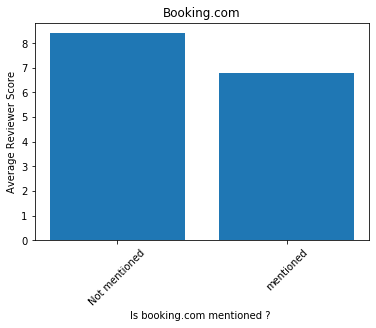

In [61]:
#Booking.com
booking_avg=data.groupby('booking_com')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,booking_avg)
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Is booking.com mentioned ? ')
plt.title('Booking.com')

In [62]:
#If a user mentions about booking.com , his/her review is probably more low


Text(0.5, 1.0, 'Wifi')

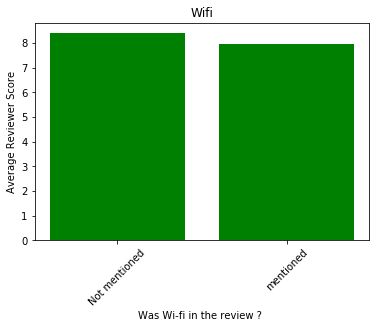

In [63]:
#Wi-fi
wifi_avg=data.groupby('wi_fi')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,wifi_avg,color='green')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was Wi-fi in the review ? ')
plt.title('Wifi')


In [64]:
# wifi might be important


Text(0.5, 1.0, 'Breakfast')

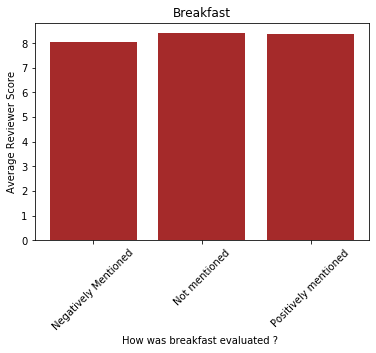

In [65]:
# wifi might be important

##Breakfast
wifi_avg=data.groupby('breakfast')['Reviewer_Score'].mean()
Index = [-1,0,1]
plt.bar(Index,wifi_avg,color='brown')
plt.xticks(Index,['Negatively Mentioned','Not mentioned','Positively mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('How was breakfast evaluated ? ')
plt.title('Breakfast')


In [66]:
#I guess breakfast isn't so important


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

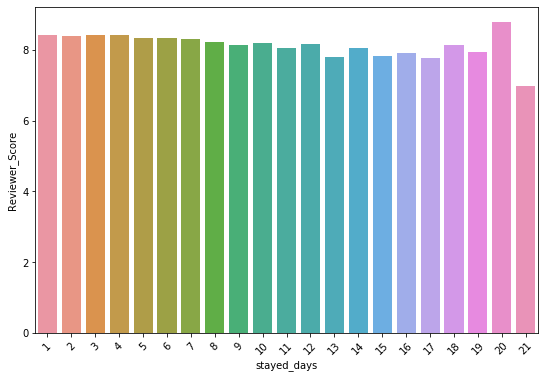

In [67]:
## Stayed_days
stayed_days_hist=data.groupby("stayed_days")['Reviewer_Score'].mean().reset_index().sort_values(by='stayed_days',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='stayed_days',y='Reviewer_Score', data=stayed_days_hist)
plt.xticks(rotation=45)

In [68]:
#According to General trend , the more the staying , the less the reviewer_score .


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

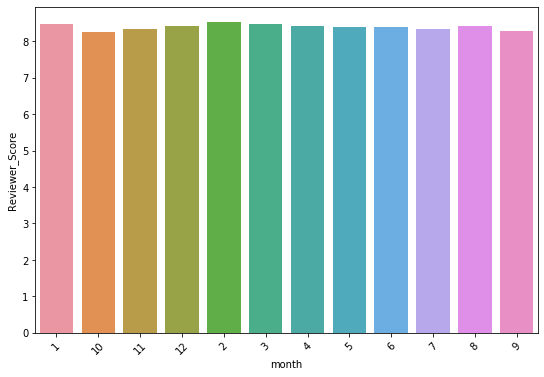

In [69]:
## Month
month_hist=data.groupby("month")['Reviewer_Score'].mean().reset_index().sort_values(by='month',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='month',y='Reviewer_Score', data=month_hist)
plt.xticks(rotation=45)

In [70]:
#Month isn't important.


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

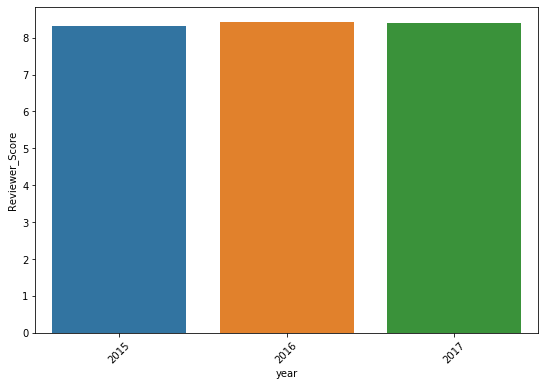

In [71]:
##Year
year_hist=data.groupby("year")['Reviewer_Score'].mean().reset_index().sort_values(by='year',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='year',y='Reviewer_Score', data=year_hist)
plt.xticks(rotation=45)

In [72]:
#Year isn't important


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

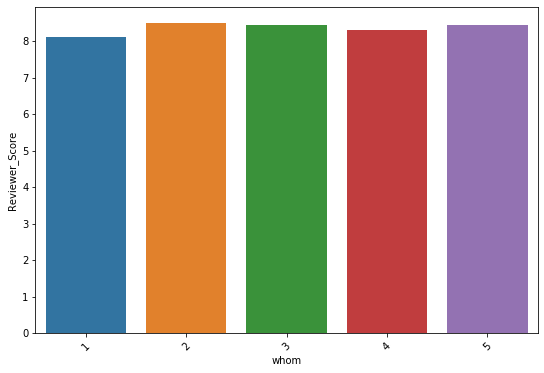

In [73]:
#Whom
whom_hist=data.groupby("whom")['Reviewer_Score'].mean().reset_index().sort_values(by='whom',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='whom',y='Reviewer_Score', data=whom_hist)
plt.xticks(rotation=45)

In [74]:
#This attribute doens't look so important .


Text(0.5, 1.0, 'Small Room')

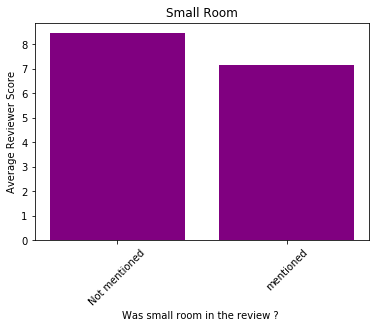

In [75]:
##Small Room
sr_avg=data.groupby('room_small')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,sr_avg,color='purple')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was small room in the review ? ')
plt.title('Small Room')


In [76]:
#I think this attribute is significant for reviewers


Text(0.5, 1.0, 'Air Conditioning')

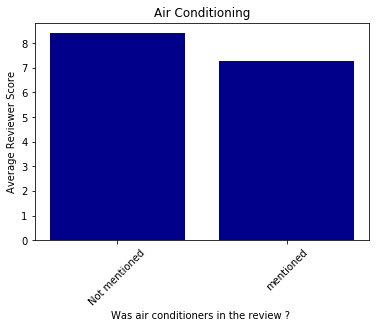

In [77]:
##Air_conditioners
ac_avg=data.groupby('air_conditioning')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,ac_avg,color='darkblue')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was air conditioners in the review ? ')
plt.title('Air Conditioning')

In [78]:
#air_conditioning is an important input variable.


Text(0.5, 1.0, 'Room Problem')

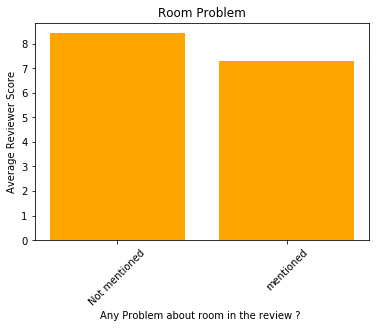

In [79]:
##room_problem
rp_avg=data.groupby('room_problem')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,rp_avg,color='orange')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Any Problem about room in the review ? ')
plt.title('Room Problem')

In [84]:
#I think room problem is significant



Text(0.5, 1.0, 'Location')

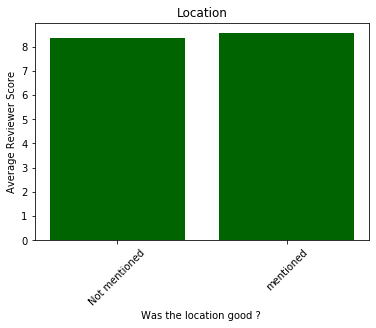

In [85]:
##location
lc_avg=data.groupby('location')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,lc_avg,color='darkgreen')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was the location good ? ')
plt.title('Location')


In [83]:
#Location isn't important


Text(0.5, 1.0, 'Staff')

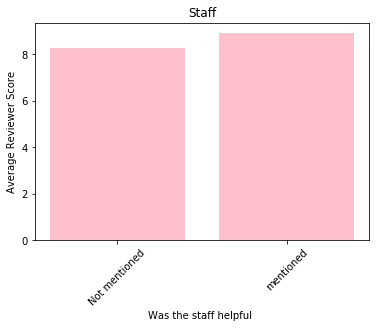

In [81]:
##Staff
st_avg=data.groupby('staff')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,st_avg,color='pink')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was the staff helpful ')
plt.title('Staff')

In [86]:
#Staff is an important parameter


Text(0.5, 1.0, 'Bed and Room')

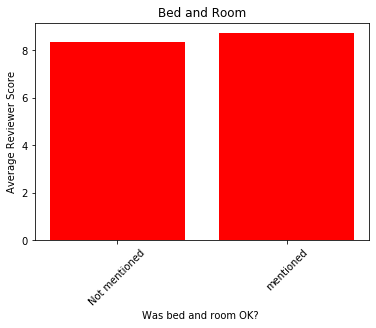

In [87]:
##Bed_and_Room
br_avg=data.groupby('bed_and_room')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,br_avg,color='red')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was bed and room OK? ')
plt.title('Bed and Room')

In [88]:
#Bed_and_room parameter isn't so important .


Text(0.5, 1.0, 'Mobile Device')

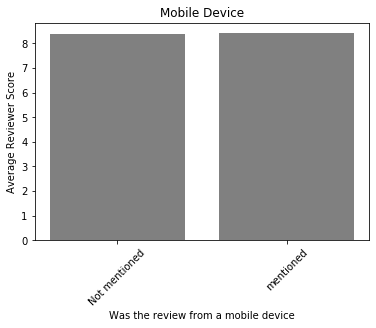

In [89]:
##Mobile Device
md_avg=data.groupby('mobile_device')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,md_avg,color='gray')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was the review from a mobile device')
plt.title('Mobile Device')

In [90]:
#Mobile_device parameter isn't  important


Text(0.5, 1.0, 'Trip Type')

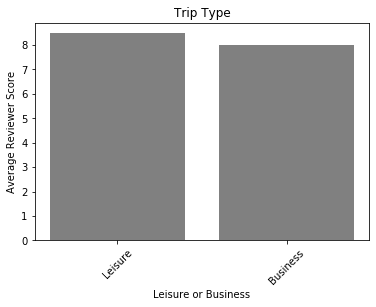

In [91]:
##Trip Type
tt_avg=data.groupby('Trip_type')['Reviewer_Score'].mean()
Index = [1,2]
plt.bar(Index,tt_avg,color='gray')
plt.xticks(Index,['Leisure','Business'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Leisure or Business')
plt.title('Trip Type')

In [92]:
#Business type of trips are rating lower .
# Trip_type parameter is important

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

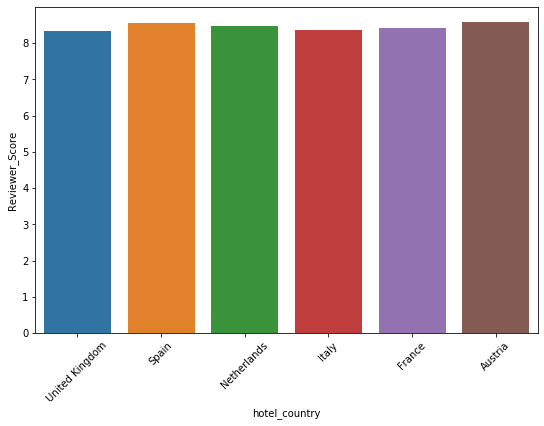

In [93]:
##THE HOTELS OF COUNTRIES
the_hotels_of_countries_hist=data.groupby("hotel_country")['Reviewer_Score'].mean().reset_index().sort_values(by='hotel_country',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='hotel_country',y='Reviewer_Score', data=the_hotels_of_countries_hist)
plt.xticks(rotation=45)

In [94]:
#Hotels in Austria are evaluated with a higher rate than other countries
#However, this attribute isn't important

In [95]:
#Correlation Matrix:
corr_df = data[['Average_Score','Additional_Number_of_Scoring','Review_Total_Negative_Word_Counts','Total_Number_of_Reviews','Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Day_Passed','stayed_days','lat','lng']]    
corr_df = corr_df.corr()


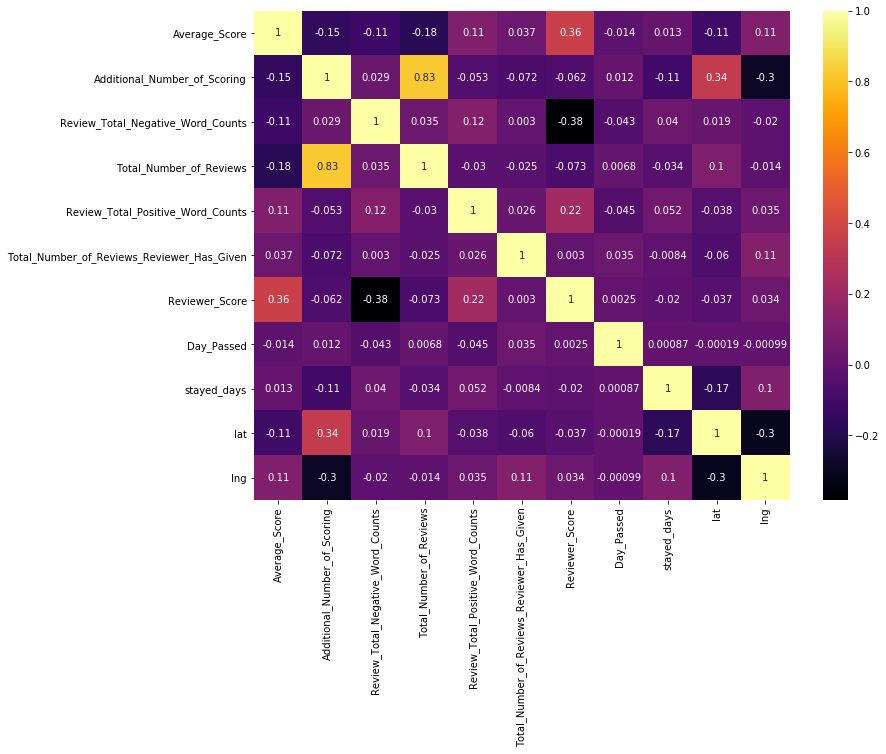

In [96]:
# Set up the matplot figure
f,ax = plt.subplots(figsize=(12,9))

#Draw the heatmap using seaborn
sns.heatmap(corr_df, cmap='inferno', annot=True)

In [ ]:
#Reviewer_Score may have correlations with Average_Score ,Review_Total_Negative_Word_Counts ,Review_Total_Positive_Word_Counts 

In [97]:
data_cloned = data


In [98]:
#Removing unimportant columns
data = data.drop(['Hotel_Address','Additional_Number_of_Scoring','Hotel_Name','Reviewer_Nationality','Negative_Review','Total_Number_of_Reviews','Positive_Review','Total_Number_of_Reviews_Reviewer_Has_Given','lat','lng','Tags','Day_Passed','whom','breakfast','location','bed_and_room','month','year','hotel_country','mobile_device'],axis=1)
#Making continent column as numerical via get_dummies
continents = pd.get_dummies(data['continent'])
#In order to get rid of collinearity , removing one column from continents
continents = continents.drop('Other',axis=1)

In [99]:
#For trip_type column , I assigned 0&1 instead of 1&2
data['Trip_type'] = data['Trip_type'].map(lambda x: 0 if x == 2 else x)

In [100]:
data = pd.concat([data,continents],axis = 1)

In [101]:
data = data.rename(columns = {'Trip_type':'Leisure_or_not'})
data = data.drop('continent',axis=1)

In [103]:
data

,Average_Score,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Reviewer_Score,Leisure_or_not,stayed_days,room_small,wi_fi,air_conditioning,booking_com,room_problem,staff,Africa,Asia,Europe,North America,Oceania,South America
0,7.7,397,11,2.9,1.0,6,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0
1,7.7,0,105,7.5,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
2,7.7,42,21,7.1,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
3,7.7,210,26,3.8,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,7.7,140,8,6.7,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512465,8.1,14,2,7.0,1.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
512466,8.1,11,11,5.8,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
512467,8.1,19,0,2.5,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
512468,8.1,0,25,8.8,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0


In [109]:
data[['Africa','Europe','North America',"Oceania","South America"]]

,Africa,Europe,North America,Oceania,South America
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
512465,0,0,0,0,0
512466,0,1,0,0,0
512467,1,0,0,0,0
512468,0,0,1,0,0


In [102]:
y = data['Reviewer_Score'].values
X = data.drop('Reviewer_Score',axis=1).values

In [110]:
y

array([2.9, 7.5, 7.1, ..., 2.5, 8.8, 8.3])

In [111]:
X

NameError: name 'x' is not defined

In [ ]:
#Appliyng XGBoost to our data
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train ,X_test ,y_train ,y_test = train_test_split(X,y ,test_size=0.2 ,random_state = 20)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
xg_train = xgb.DMatrix(X_train, label=y_train)

In [ ]:
xg_test = xgb.DMatrix(X_test, label=y_test)
param = {}
# I used gamma regression 
param['objective'] = 'reg:gamma'
param['eta'] = 0.2
param['max_depth'] = 4
param['silent'] = 1
param['nthread'] = 4
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 25


In [ ]:
bst = xgb.train(param, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)

In [ ]:
#Calculate Error
error = pred - y_test
error = abs(error)
error_rate = np.mean(error)/np.mean(y_test)
print("error rate = %f " %error_rate )